# Statistics Fundamentals
Statistics is primarily about analyzing data samples, and that starts with udnerstanding the distribution of data in a sample.

## Analyzing Data Distribution
A great deal of statistical analysis is based on the way that data values are distributed within the dataset. In this section, we'll explore some statistics that you can use to tell you about the values in a dataset.

### Measures of Central Tendency
The term *measures of central tendency* sounds a bit grand, but really it's just a fancy way of saying that we're interested in knowing where the middle value in our data is. For example, suppose decide to conduct a study into the comparative salaries of people who graduated from the same school. You might record the results like this:

| Name     | Salary      |
|----------|-------------|
| Dan      | 50,000      |
| Joann    | 54,000      |
| Pedro    | 50,000      |
| Rosie    | 189,000     |
| Ethan    | 55,000      |
| Vicky    | 40,000      |
| Frederic | 59,000      |

Now, some of the former-students may earn a lot, and others may earn less; but what's the salary in the middle of the range of all salaries?

#### Mean
A common way to define the central value is to use the *mean*, often called the *average*. This is calculated as the sum of the values in the dataset, divided by the number of observations in the dataset. When the dataset consists of the full population, the mean is represented by the Greek symbol ***&mu;*** (*mu*), and the formula is written like this:

\begin{equation}\mu = \frac{\displaystyle\sum_{i=1}^{N}X_{i}}{N}\end{equation}

More commonly, when working with a sample, the mean is represented by ***x&#772;*** (*x-bar*), and the formula is written like this (note the lower case letters used to indicate values from a sample):

\begin{equation}\bar{x} = \frac{\displaystyle\sum_{i=1}^{n}x_{i}}{n}\end{equation}

In the case of our list of heights, this can be calculated as:

\begin{equation}\bar{x} = \frac{50000+54000+50000+189000+55000+40000+59000}{7}\end{equation}

Which is **71,000**.

>In technical terminology, ***x&#772;*** is a *statistic* (an estimate based on a sample of data) and ***&mu;*** is a *parameter* (a true value based on the entire population). A lot of the time, the parameters for the full population will be impossible (or at the very least, impractical) to measure; so we use statistics obtained from a representative sample to approximate them. In this case, we can use the sample mean of salary for our selection of surveyed students to try to estimate the actual average salary of all students who graduate from our school.

The R **mean** function can be applied to a numeric column of a data frame:

In [1]:
df1 = data.frame(name = c('Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'), 
                Salary = c(50000,54000,50000,189000,55000,40000,59000))
mean(df1$Salary)

[1] 71000

So, is **71,000** really the central value? Or put another way, would it be reasonable for a graduate of this school to expect to earn $71,000? After all, that's the average salary of a graduate from this school.

If you look closely at the salaries, you can see that out of the seven former students, six earn less than the mean salary. The data is *skewed* by the fact that Rosie has clearly managed to find a much higher-paid job than her classmates.

#### Median
OK, let's see if we can find another definition for the central value that more closely reflects the expected earning potential of students attending our school. Another measure of central tendency we can use is the *median*. To calculate the median, we need to sort the values into ascending order and then find the middle-most value. When there are an odd number of observations, you can find the position of the median value using this formula (where *n* is the number of observations):

\begin{equation}\frac{n+1}{2}\end{equation}

Remember that this formula returns the *position* of the median value in the sorted list; not the value itself.

If the number of observations is even, then things are a little (but not much) more complicated. In this case you calculate the median as the average of the two middle-most values, which are found like this:

\begin{equation}\frac{n}{2} \;\;\;\;and \;\;\;\; \frac{n}{2} + 1\end{equation}

So, for our graduate salaries; first lets sort the dataset:

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

There's an odd number of observation (7), so the median value is at position (7 + 1) &div; 2; in other words, position 4:

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
|***>54,000*** |
| 55,000      |
| 59,000      |
| 189,000     |

So the median salary is **54,000**.

The R *median** function can be used to compute this statistic:

In [2]:
median(df1$Salary)

[1] 54000

#### Mode
Another related statistic is the *mode*, which indicates the most frequently occurring value. If you think about it, this is potentially a good indicator of how much a student might expect to earn when they graduate from the school; out of all the salaries that are being earned by former students, the mode is earned by more than any other.

Looking at our list of salaries, there are two instances of former students earning **50,000**, but only one instance each for all other salaries:

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

The mode is therefore **50,000**.

R does not have a mode function, but it is not too hard to write one. The trick is to find the unique values and then the maximum of the tabulated counts of the unique values. 

In [3]:
get_mode <- function(x) {
   uniq_x <- unique(x)
   uniq_x[which.max(tabulate(match(x, uniq_x)))]
}

get_mode(df1$Salary)

[1] 50000

##### Multimodal Data
It's not uncommon for a set of data to have more than one value as the mode. For example, suppose Ethan receives a raise that takes his salary to **59,000**:

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
|***>59,000***|
|***>59,000***|
| 189,000     |

Now there are two values with the highest frequency. This dataset is *bimodal*. More you may want to create a **frequency table** to see the number of occurrences of each unique value. The R **table** function computes and prints a frequency table:

In [4]:
df2 = data.frame(name = c('Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'), 
                Salary = c(50000,54000,50000,189000,59000,40000,59000))

table(df2$Salary)


 40000  50000  54000  59000 189000 
     1      2      1      2      1 

### Distribution and Density
Now we know something about finding the center, we can start to explore how the data is distributed around it. What we're interested in here is understanding the general "shape" of the data distribution so that we can begin to get a feel for what a 'typical' value might be expected to be.

We can start by finding the extremes - the minimum and maximum. In the case of our salary data, the lowest paid graduate from our school is Vicky, with a salary of **40,000**; and the highest-paid graduate is Rosie, with **189,000**.

The R ***min*** and ***max*** functions return these values.

Run the following code to compare the minimum and maximum salaries to the central measures we calculated previously:

In [5]:
df3 = data.frame(Name = c('Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'),
                 Salary = c(50000,54000,50000,189000,55000,40000,59000))

print(paste('Min    = ', as.character(min(df3$Salary))))
print(paste('Mode   = ', as.character(get_mode(df3$Salary))))
print(paste('Median = ', as.character(median(df3$Salary))))
print(paste('Mean   = ', as.character(mean(df3$Salary))))
print(paste('max    = ', as.character(max(df3$Salary))))

[1] "Min    =  40000"
[1] "Mode   =  50000"
[1] "Median =  54000"
[1] "Mean   =  71000"
[1] "max    =  189000"


We can examine these values, and get a sense for how the data is distributed - for example, we can see that the *mean* is closer to the max than the *median*, and that both are closer to the *min* than to the *max*.

However, it's generally easier to get a sense of the distribution by visualizing the data. Let's start by creating a histogram of the salaries, highlighting the *mean* and *median* salaries (the *min*, *max* are fairly self-evident, and the *mode* is wherever the highest bar is):

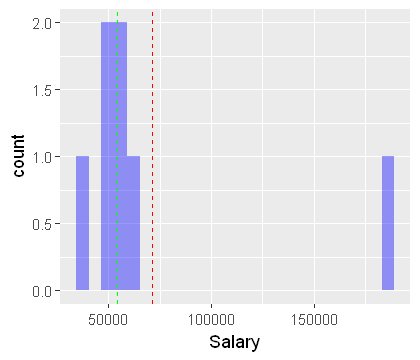

In [6]:
library(ggplot2)
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions

ggplot(df3) + geom_histogram(aes(Salary), bins = 25, fill = 'blue', alpha = 0.4) +
              geom_vline(xintercept = mean(df3$Salary), color = 'red', linetype="dashed") +
              geom_vline(xintercept = median(df3$Salary), color = 'green', linetype="dashed")

The <span style="color:magenta">***mean***</span> and <span style="color:green">***median***</span> are shown as dashed lines. Note the following:
- *Salary* is a continuous data value - graduates could potentially earn any value along the scale, even down to a fraction of cent.
- The number of bins in the histogram determines the size of each salary band for which we're counting frequencies. Fewer bins means merging more individual salaries together to be counted as a group.
- The majority of the data is on the left side of the histogram, reflecting the fact that most graduates earn between 40,000 and 55,000
- The mean is a higher value than the median and mode.
- There are gaps in the histogram for salary bands that nobody earns.

The histogram shows the relative frequency of each salary band, based on the number of bins. It also gives us a sense of the *density* of the data for each point on the salary scale. With enough data points, and small enough bins, we could view this density as a line that shows the shape of the data distribution.

Run the following cell to show the density of the salary data as a line on top of the histogram. Notice that the y in the histogram must be defined to be **..density..** so that the vertical scale of the histogram and density plot are the same. The **adjust** argument determines the span of the smoothing kernel used for the density estimation. 

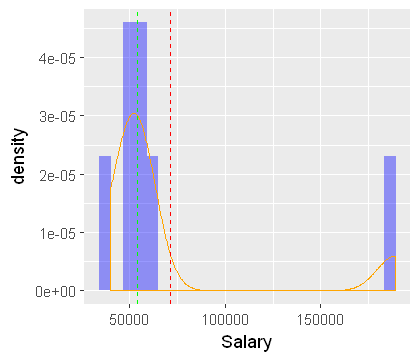

In [7]:
library(ggplot2)
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions

ggplot(df3, aes(x = Salary)) + 
              geom_histogram(aes(y=..density..), bins = 25, fill = 'blue', alpha = 0.4) +
              geom_density(adjust = 3, size = 0.5, color = 'orange') +
              geom_vline(xintercept = mean(df3$Salary), color = 'red', linetype="dashed") +
              geom_vline(xintercept = median(df3$Salary), color = 'green', linetype="dashed")

Note that the density line takes the form of an asymmetric curve that has a "peak" on the left and a long tail on the right. We describe this sort of data distribution as being *skewed*; that is, the data is not distributed symmetrically but "bunched together" on one side. In this case, the data is bunched together on the left, creating a long tail on the right; and is described as being *right-skewed* because some infrequently occurring high values are pulling the *mean* to the right.

Let's take a look at another set of data. We know how much money our graduates make, but how many hours per week do they need to work to earn their salaries? Here's the data:

| Name     | Hours |
|----------|-------|
| Dan      | 41    |
| Joann    | 40    |
| Pedro    | 36    |
| Rosie    | 30    |
| Ethan    | 35    |
| Vicky    | 39    |
| Frederic | 40    |

Run the following code to show the distribution of the hours worked:

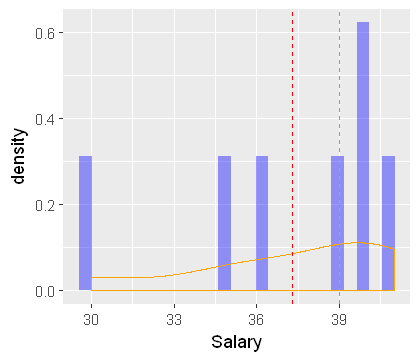

In [8]:
df4 = data.frame(Name = c('Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'),
                 Salary = c(41,40,36,30,35,39,40))

ggplot(df4, aes(x = Salary)) + 
              geom_histogram(aes(y=..density..), bins = 25, fill = 'blue', alpha = 0.4) +
              geom_density(adjust = 1, size = 0.5, color = 'orange') +
              geom_vline(xintercept = mean(df4$Salary), color = 'red', linetype="dashed") +
              geom_vline(xintercept = median(df4$Salary), color = 'green', linetype="dashed")

Once again, the distribution is skewed, but this time it's **left-skewed**. Note that the curve is asymmetric with the <span style="color:magenta">***mean***</span> to the left of the <span style="color:green">***median***</span> and the *mode*; and the average weekly working hours skewed to the lower end.

Once again, Rosie seems to be getting the better of the deal. She earns more than her former classmates for working fewer hours. Maybe a look at the test scores the students achieved on their final grade at school might help explain her success:

| Name     | Grade |
|----------|-------|
| Dan      | 50    |
| Joann    | 50    |
| Pedro    | 46    |
| Rosie    | 95    |
| Ethan    | 50    |
| Vicky    | 5     |
| Frederic | 57    |

Let's take a look at the distribution of these grades:

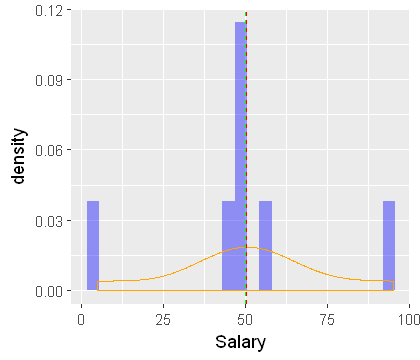

In [9]:
df5 = data.frame(Name = c('Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'),
                 Salary = c(50,50,46,95,50,5,57))

ggplot(df5, aes(x = Salary)) + 
              geom_histogram(aes(y=..density..), bins = 25, fill = 'blue', alpha = 0.4) +
              geom_density(adjust = 6, size = 0.5, color = 'orange') +
              geom_vline(xintercept = mean(df5$Salary), color = 'red', linetype="dashed") +
              geom_vline(xintercept = median(df5$Salary), color = 'green', linetype="dashed")

This time, the distribution is symmetric, forming a "bell-shaped" curve. The <span style="color:magenta">***mean***</span>, <span style="color:green">***median***</span>, and mode are at the same location, and the data tails off evenly on both sides from a central peak.

Statisticians call this a *normal* distribution (or sometimes a *Gaussian* distribution), and it occurs quite commonly in many scenarios due to something called the *Central Limit Theorem*, which reflects the way continuous probability works - more about that later.

#### Skewness and Kurtosis
You can measure *skewness* (in which direction the data is skewed and to what degree) and kurtosis (how "peaked" the data is) to get an idea of the shape of the data distribution. In R e1071 package includes **skewness** and **krutosis** functions to compute these statistics:

[1] "Salary Skewness =  1.57540659645948"
[1] "Salary Kurtosis =  0.710151685032684"
[1] "Hours Skewness =  -0.731369575875234"
[1] "Hours Kurtosis =  -1.05880819515306"


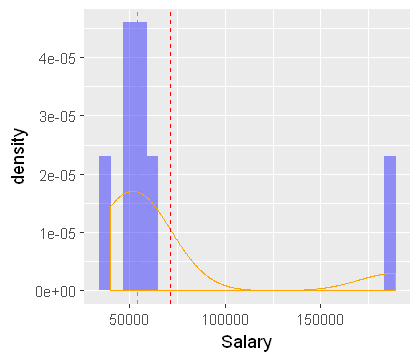

[1] "Grade Skewness =  -0.0398720388347924"
[1] "Grade Kurtosis =  -0.505568421006947"


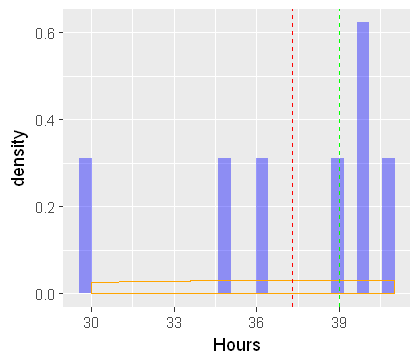

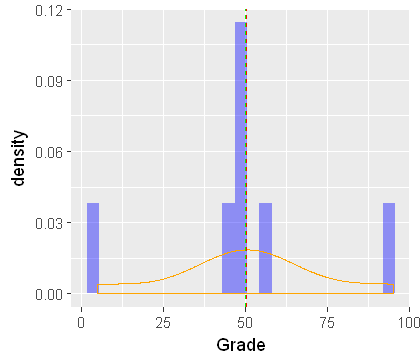

In [10]:
library(e1071)

skew_kurt = function(col, df){
    print(paste(col, 'Skewness = ', as.character(skewness(df[,col]))))
    print(paste(col, 'Kurtosis = ', as.character(kurtosis(df[,col]))))
    p = ggplot(df, aes_string(x = col)) + 
              geom_histogram(aes(y=..density..), bins = 25, fill = 'blue', alpha = 0.4) +
              geom_density(adjust = 6, size = 0.5, color = 'orange') +
              geom_vline(xintercept = mean(df[,col]), color = 'red', linetype="dashed") +
              geom_vline(xintercept = median(df[,col]), color = 'green', linetype="dashed")
    print(p)
}

df6 = data.frame(Name = c('Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'),
                 Salary = c(50000,54000,50000,189000,55000,40000,59000),
                 Hours = c(41,40,36,30,35,39,40),
                 Grade = c(50,50,46,95,50,5,57))

skew_kurt('Salary', df6)
skew_kurt('Hours', df6)
skew_kurt('Grade', df6)

Now let's look at the distribution of a real dataset - let's see how the heights of the father's measured in Galton's study of parent and child heights are distributed:

Warning message:
"package 'HistData' was built under R version 3.5.1"

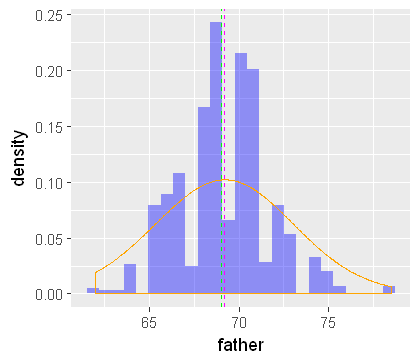

In [11]:
library(HistData)
df_G = GaltonFamilies

ggplot(df_G, aes(x = father)) + 
              geom_histogram(aes(y=..density..), bins = 25, fill = 'blue', alpha = 0.4) +
              geom_density(adjust = 6, size = 0.5, color = 'orange') +
              geom_vline(xintercept = mean(df_G$father), color = 'magenta', linetype="dashed") +
              geom_vline(xintercept = median(df_G$father), color = 'green', linetype="dashed")

As you can see, the father's height measurements are approximately normally distributed - in other words, they form a more or less *normal* distribution that is symmetric around the mean.

### Measures of Variance
We can see from the distribution plots of our data that the values in our dataset can vary quite widely. We can use various measures to quantify this variance.

#### Range
A simple way to quantify the variance in a dataset is to identify the difference between the lowest and highest values. This is called the *range*, and is calculated by subtracting the minimum value from the maximum value.

The following R code operates on the existing data frame of our school graduate data, and calculates the *range* for each of the numeric features:

In [12]:
numcols = c('Salary', 'Hours', 'Grade')
for(col in numcols){
    print(paste(col, 'range:', as.character(max(df6[,col]) - min(df6[,col]))))
}

[1] "Salary range: 149000"
[1] "Hours range: 11"
[1] "Grade range: 90"


#### Quartiles
The range is easy to calculate, but it's not a particularly useful statistic. For example, a range of 149,000 between the lowest and highest salary does not tell us which value within that range a graduate is most likely to earn -  it doesn't tell us nothing about how the salaries are distributed around the mean within that range.  

We can consider the overall spread of the data by dividing those percentiles into four *quartiles*. The first quartile contains the values from the minimum to the 25th percentile, the second from the 25th percentile to the 50th percentile (which is the median), the third from the 50th percentile to the 75th percentile, and the fourth from the 75th percentile to the maximum.

In R, you can use the ***quantile*** function to find the threshold values at the 25th, 50th, and 75th percentiles (*quantile* is a generic term for a ranked position, such as a percentile or quartile).

Run the following code to find the quartile thresholds for the weekly hours worked by our former students:

In [13]:
quantile(df6$Hours, probs = c(0.25, 0.5, 0.75))

25%  50%  75% 
35.5 39.0 40.0

Its usually easier to understand how data is distributed across the quartiles by visualizing it. You can use a histogram, but many data scientists use a kind of visualization called a *box plot* (or a *box and whiskers* plot).

Let's create a box plot for the weekly hours. Notice the **x = 1** argument, which is necessary to display a single box plot.

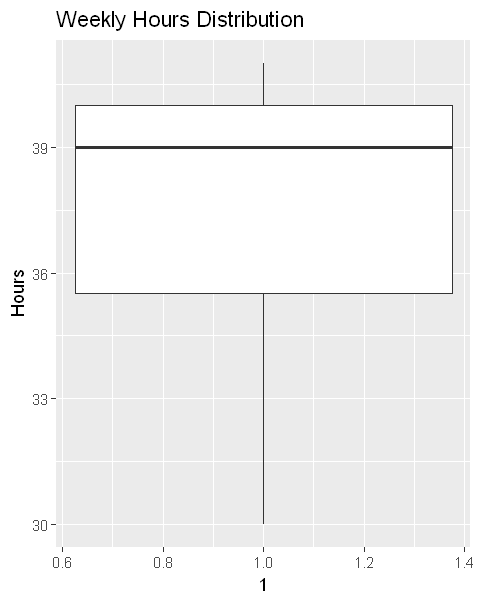

In [16]:
options(repr.plot.width=4, repr.plot.height=5)
ggplot(df6, aes(x = 1, y = Hours)) +
      geom_boxplot() +
      ggtitle('Weekly Hours Distribution')

The box plot consists of:
- A rectangular *box* that shows where the data between the 25th and 75th percentile (the second and third quartile) lie. This part of the distribution is often referred to as the *interquartile range* - it contains the middle 50 data values.
- *Whiskers* that extend from the box to the bottom of the first quartile and the top of the fourth quartile to show the full range of the data.
- A line in the box that shows that location of the median (the 50th percentile, which is also the threshold between the second and third quartile)

In this case, you can see that the interquartile range is between 35 and 40, with the median nearer the top of that range. The range of the first quartile is from around 30 to 35, and the fourth quartile is from 40 to 41.

#### Outliers
Let's take a look at another box plot - this time showing the distribution of the salaries earned by our former classmates:

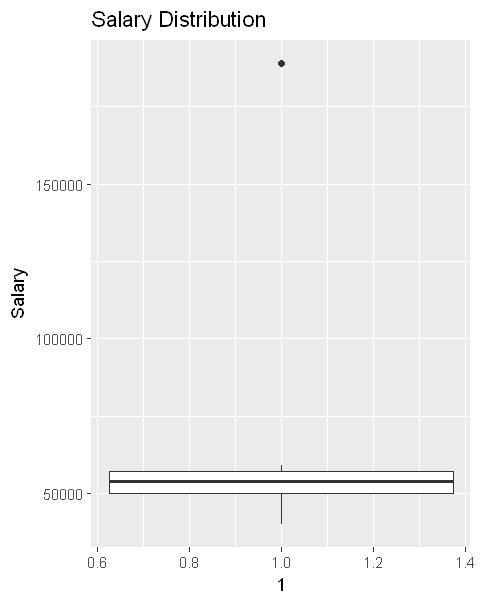

In [17]:
ggplot(df6, aes(x = 1, y = Salary)) +
      geom_boxplot() +
      ggtitle('Salary Distribution')

So what's going on here?

Well, as we've already noticed, Rosie earns significantly more than her former classmates. So much more in fact, that her salary has been identified as an *outlier*. An outlier is a value that is so far from the center of the distribution compared to other values that it skews the distribution by affecting the mean. There are all sorts of reasons that you might have outliers in your data, including data entry errors, failures in sensors or data-generating equipment, or genuinely anomalous values.

So what should we do about it?

This really depends on the data, and what you're trying to use it for. In this case, let's assume we're trying to figure out what's a reasonable expectation of salary for a graduate of our school to earn. Ignoring for the moment that we have an extremely small dataset on which to base our judgment, it looks as if Rosie's salary could be either an error (maybe she mis-typed it in the form used to collect data) or a genuine anomaly (maybe she became a professional athlete or some other extremely highly paid job). Either way, it doesn't seem to represent a salary that a typical graduate might earn.

Let's see what the distribution of the data looks like without the outlier. This process is known as **trimming** of outliers. 

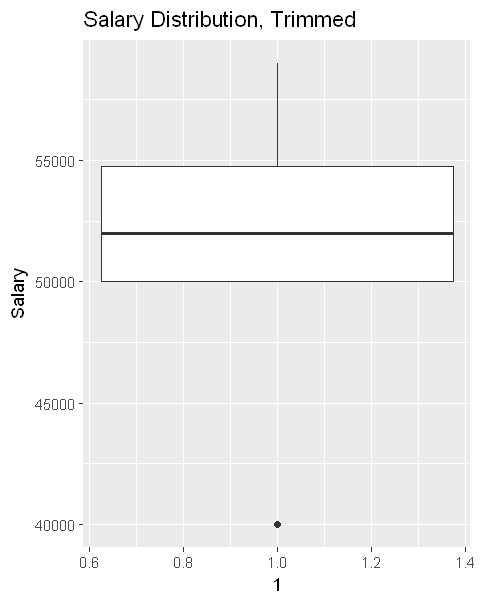

In [25]:
df_trimmed = df6[df6$Salary < 100000,]

ggplot(df_trimmed, aes(x = 1, y = Salary)) +
      geom_boxplot() +
      ggtitle('Salary Distribution, Trimmed')

Now it looks like there's a more even distribution of salaries. It's still not quite symmetrical, but there's much less overall variance. There's potentially some cause here to disregard Rosie's salary data when we compare the salaries, as it is tending to skew the analysis.

So is that OK? Can we really just ignore a data value we don't like?

Again, it depends on what you're analyzing. Let's take a look at the distribution of final grades:

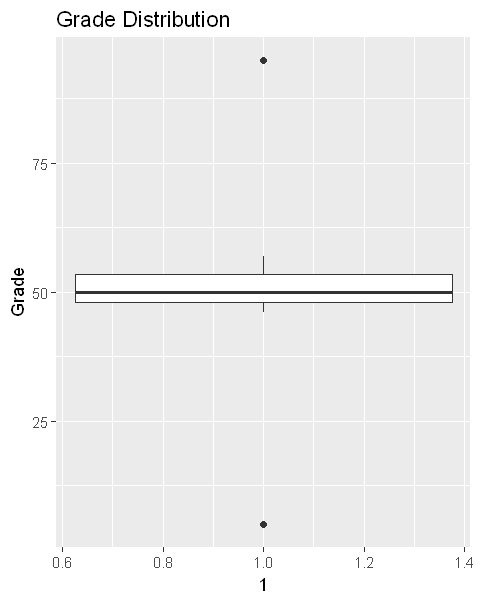

In [26]:
ggplot(df6, aes(x = 1, y = Grade)) +
      geom_boxplot() +
      ggtitle('Grade Distribution')

Once again there are outliers, this time at both ends of the distribution. However, think about what this data represents. If we assume that the grade for the final test is based on a score out of 100, it seems reasonable to expect that some students will score very low (maybe even 0) and some will score very well (maybe even 100); but most will get a score somewhere in the middle.  The reason that the low and high scores here look like outliers might just be because we have so few data points. Let's see what happens if we include a few more students in our data:

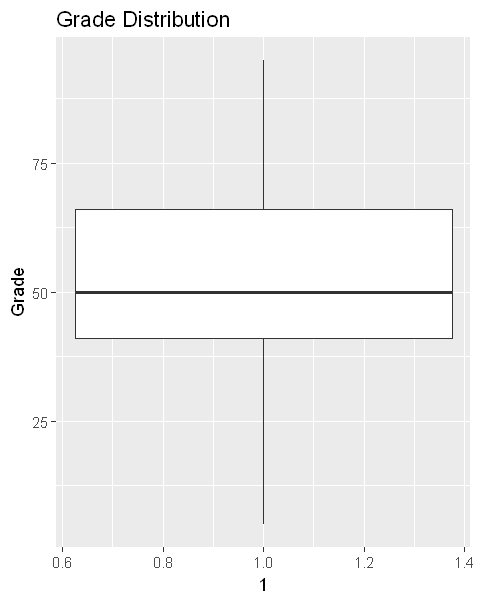

In [27]:
df7 = data.frame(Name = c('Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 
                          'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 
                          'Rajab', 'Naiyana', 'Kian', 'Jenny'),
                Grade = c(50,50,46,95,50,5,57,42,26,72,78,60,40,17,85))

ggplot(df7, aes(x = 1, y = Grade)) +
      geom_boxplot() +
      ggtitle('Grade Distribution')

With more data, there are some more high and low scores; so we no longer consider the isolated cases to be outliers.

The key point to take away here is that you need to really understand the data and what you're trying to do with it, and you need to ensure that you have a reasonable sample size, before determining what to do with outlier values.

#### Variance and Standard Deviation
We've seen how to understand the *spread* of our data distribution using the range, percentiles, and quartiles; and we've seen the effect of outliers on the distribution. Now it's time to look at how to measure the amount of variance in the data.

##### Variance
Variance is measured as the average of the squared difference from the mean. For a full population, it's indicated by a squared Greek letter *sigma* (***&sigma;<sup>2</sup>***) and calculated like this:

\begin{equation}\sigma^{2} = \frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}\end{equation}

For a sample, it's indicated as ***s<sup>2</sup>*** calculated like this:

\begin{equation}s^{2} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}\end{equation}

In both cases, we sum the difference between the individual data values and the mean and square the result. Then, for a full population we just divide by the number of data items to get the average. When using a sample, we divide by the total number of items **minus 1** to correct for sample bias.

Let's work this out for our student grades (assuming our data is a sample from the larger student population).

First, we need to calculate the mean grade:

\begin{equation}\bar{x} = \frac{50+50+46+95+50+5+57}{7}\approx 50.43\end{equation}

Then we can plug that into our formula for the variance:

\begin{equation}s^{2} = \frac{(50-50.43)^{2}+(50-50.43)^{2}+(46-50.43)^{2}+(95-50.43)^{2}+(50-50.43)^{2}+(5-50.43)^{2}+(57-50.43)^{2}}{7-1}\end{equation}

So:

\begin{equation}s^{2} = \frac{0.185+0.185+19.625+1986.485+0.185+2063.885+43.165}{6}\end{equation}

Which simplifies to:

\begin{equation}s^{2} = \frac{4113.715}{6}\end{equation}

Giving the result:

\begin{equation}s^{2} \approx 685.619\end{equation}

The higher the variance, the more spread your data is around the mean.

In R ***var*** function computes the variance of a vector of values:

In [28]:
var(df6$Grade)

[1] 685.619

##### Standard Deviation
To calculate the variance, we squared the difference of each value from the mean. If we hadn't done this, the numerator of our fraction would always end up being zero (because the mean is at the center of our values). However, this means that the variance is not in the same unit of measurement as our data - in our case, since we're calculating the variance for grade points, it's in grade points squared; which is not very helpful.

To get the measure of variance back into the same unit of measurement, we need to find its square root:

\begin{equation}s = \sqrt{685.619} \approx 26.184\end{equation}

So what does this value represent?

It's the *standard deviation* for our grades data. More formally, it's calculated like this for a full population:

\begin{equation}\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}}\end{equation}

Or like this for a sample:

\begin{equation}s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}}\end{equation}

Note that in both cases, it's just the square root of the corresponding variance formula!

The R ***sd*** function computes the standard deviation of a vector of values:

In [30]:
sd(df6$Grade)

[1] 26.18433

#### Standard Deviation in a Normal Distribution

In statistics and data science, we spend a lot of time considering *normal* distributions; because they occur so frequently. The standard deviation has an important relationship to play in a normal distribution.

Run the following cell to show a histogram of a *standard normal* distribution (which is a distribution with a mean of 0 and a standard deviation of 1):

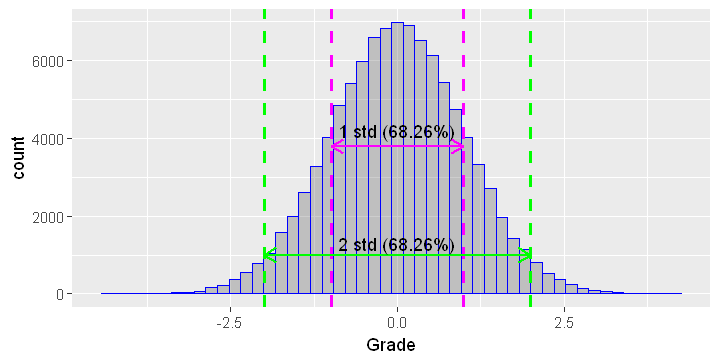

In [47]:
options(repr.plot.width=6, repr.plot.height=3)

## Data frame with 100,000 standard Normal values
df_normal = data.frame(Grade = rnorm(100000, mean = 0, sd = 1)) 

std = sd(df_normal$Grade)

## Plot the Normal data with the std lines 
ggplot(df_normal, aes(Grade)) + 
       geom_histogram(alpha = 0.3, color = 'blue', bins = 50) + 
       geom_vline(xintercept = std, color = 'magenta', linetype="dashed", size = 1) +
       geom_vline(xintercept = 2 * std, color = 'green', linetype="dashed", size = 1) + 
       geom_line(data = data.frame(x=c(std,-std),y=c(3800,3800)), aes(x,y), color = 'magenta',
                 arrow = arrow(length=unit(0.30,"cm"), ends = "both"), size = 0.8) +
       annotate("text", x = 0, y = 4200, label = '1 std (68.26%)') +
       geom_vline(xintercept = -std, color = 'magenta', linetype="dashed", size = 1) +
       geom_vline(xintercept = -2 * std, color = 'green', linetype="dashed", size = 1) + 
       geom_line(data = data.frame(x=c(2*std,-2*std),y=c(1000,1000)), aes(x,y), color = 'green',
                 arrow = arrow(length=unit(0.30,"cm"), ends = "both"), size = 0.8) +
       annotate("text", x = 0, y = 1300, label = '2 std (68.26%)')

The horizontal colored lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:
- Approximately 68.26% of values fall within one standard deviation from the mean.
- Approximately 95.45% of values fall within two standard deviations from the mean.
- Approximately 99.73% of values fall within three standard deviations from the mean.

#### Z Score
So in a normal (or close to normal) distribution, standard deviation provides a way to evaluate how far from a mean a given range of values falls, allowing us to compare where a particular value lies within the distribution. For example, suppose Rosie tells you she was the highest scoring student among her friends - that doesn't really help us assess how well she scored. She may have scored only a fraction of a point above the second-highest scoring student. Even if we know she was in the top quartile; if we don't know how the rest of the grades are distributed it's still not clear how well she performed compared to her friends.

However, if she tells you how many standard deviations higher than the mean her score was, this will help you compare her score to that of her classmates.

So how do we know how many standard deviations above or below the mean a particular value is? We call this a *Z Score*, and it's calculated like this for a full population:

\begin{equation}Z = \frac{x - \mu}{\sigma}\end{equation}

or like this for a sample:

\begin{equation}Z = \frac{x - \bar{x}}{s}\end{equation}

So, let's examine Rosie's grade of 95. Now that we know the *mean* grade is 50.43 and the *standard deviation* is 26.184, we can calculate the Z Score for this grade like this:

\begin{equation}Z = \frac{95 - 50.43}{26.184} = 1.702\end{equation}.

So Rosie's grade is 1.702 standard deviations above the mean.

### Summarizing Data Distribution in Python
We've seen how to obtain individual statistics in R, but you can also use the ***summary*** function to retrieve summary statistics for all numeric columns in a data frame. These summary statistics include many of the statistics we've examined so far (though it's worth noting that the *median* is not included):

In [48]:
summary(df6)

       Name       Salary           Hours           Grade      
 Dan     :1   Min.   : 40000   Min.   :30.00   Min.   : 5.00  
 Ethan   :1   1st Qu.: 50000   1st Qu.:35.50   1st Qu.:48.00  
 Frederic:1   Median : 54000   Median :39.00   Median :50.00  
 Joann   :1   Mean   : 71000   Mean   :37.29   Mean   :50.43  
 Pedro   :1   3rd Qu.: 57000   3rd Qu.:40.00   3rd Qu.:53.50  
 Rosie   :1   Max.   :189000   Max.   :41.00   Max.   :95.00  
 Vicky   :1                                                   